In [1]:
import numpy as np  
import matplotlib.pyplot as plt    
from matplotlib.ticker import ScalarFormatter   


In [2]:
#Fixed parameter values
pi = 1710; 
#beta1 =1.72;
mu =1/(83*365); 
eps =0.33;   #Youngji paper
tau = 0.8; tau2 = 0.8;
psi = 0.5; 
phi1, phi2 = 1/180, 1/180
h1= 0.0012; 
h2 = (1-0.74)*h1;
rho = 1/14; rhot =1/10; rhoh =1/10;
eta1= 0.71; eta2= 0.41; eta4= 0.85; eta3 = 0.46;
a = 1/3  # fixed to be 3 days 
 

theta = 0.5 # parameter adjusting reduced perception risk (assumed)
delta = 0.8  # proportion of tested people who quarantine/adhere to protective measures (assumed)
alpha1, alpha2 = 0.5, 0.5  # parameters which shows to which information people are more concerned

Dtilde, Btilde = 5, 5  # reactivity to information in vaccination
D, B = 1*Dtilde, 1*Btilde # reactivity to information in testing (assumed equal)
Fmax = 0.027; F10 = 0.0029; F20 = (0.9)*F10;
Tmax = 0.5; T10 = 0.03; T20 = 0.03    #Tmax is adjusted to have a good fit
#Tmax = 0.022; T10 = 0.014; #T10 = 0.0013; 

# Fitted parameters
k1=  0.51
beta1=  0.67
beta2=  0.39
xi=  0.99
d1 =0.000071; d2 = 0.000073;  

In [3]:
#F10, F20, T10, T20 = 0,0,0,0.
#T20 =0;
S1_dfe = pi/(F10 +mu); S2_dfe = (pi*phi1*F10)/((phi1+mu)*(F10+mu)*(F20+mu)); V1_dfe = (pi*F10)/((phi1+mu)*(F10 +mu));
V2_dfe = (pi*phi1*F10*F20)/(mu*(phi1+mu)*(F10+mu)*(F20+mu));
N_dfe = S1_dfe + S2_dfe + V1_dfe + V2_dfe;

C1 = (beta1*S1_dfe)/N_dfe;  C2 = (1/N_dfe)*(beta2*((1-eta2)*S2_dfe + (1-eta4)*V2_dfe) + beta2*(1-eta1)*V1_dfe);
M1 = (eps*(1-tau))/((mu +eps)*(mu+rho+xi*T10))
M2 = (eps*tau)/((mu +eps)*(d1+mu+rho+T10))
M3 = (eps*tau)/((mu +eps)*(d1+mu+rho+T20))
M4 = ( xi*(1-tau)*T10*eps*(d1+mu+rho+T10) + tau*T10*eps*(mu+rho+xi*T10))/((mu +eps)*(d1+mu+rho+T10)*(h1+mu+rhot)*(mu+rho+xi*T10))
M5 = tau*T20*eps/((mu +eps)*(d1+mu+rho+T20)*(h2+mu+rhot))
M6 = (eps*(1-tau))/((mu +eps)*(mu+rho+xi*T20))
M7 = xi*(1-tau)*eps*T20/((mu +eps)*(mu+rho+xi*T20)*(h2+mu+rhot))
R_e = C1*(psi*M1 + M2 + M3 + (1-delta)*(M4+M5)) + C2*(psi*M6 + (1-delta)*M7)
print('Reproduction number =', R_e)

Reproduction number = 0.20083454788859323


Text(0, 0.5, '$R_e$')

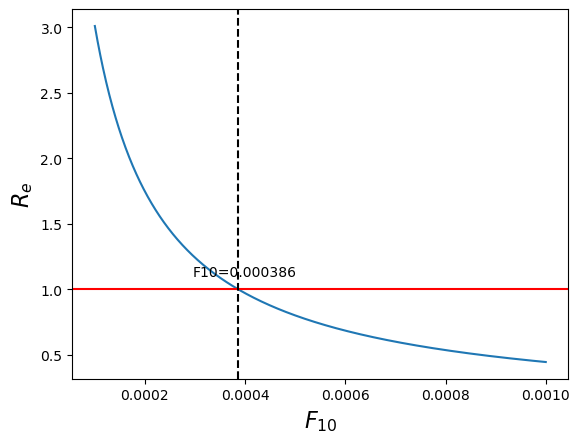

In [4]:
def Ef_Rep(F10):
    S1_dfe = pi/(F10 +mu); S2_dfe = (pi*phi1*F10)/((phi1+mu)*(F10+mu)*(F20+mu)); V1_dfe = (pi*F10)/((phi1+mu)*(F10 +mu));
    V2_dfe = (pi*phi1*F10*F20)/(mu*(phi1+mu)*(F10+mu)*(F20+mu));
    N_dfe = S1_dfe + S2_dfe + V1_dfe + V2_dfe;
    
    C1 = (beta1*S1_dfe)/N_dfe;  C2 = (1/N_dfe)*(beta2*((1-eta2)*S2_dfe + (1-eta4)*V2_dfe) + beta2*(1-eta1)*V1_dfe);
    M1 = (eps*(1-tau))/((mu +eps)*(mu+rho+xi*T10))
    M2 = (eps*tau)/((mu +eps)*(d1+mu+rho+T10))
    M3 = (eps*tau)/((mu +eps)*(d1+mu+rho+T20))
    M4 = ( xi*(1-tau)*T10*eps*(d1+mu+rho+T10) + tau*T10*eps*(mu+rho+xi*T10))/((mu +eps)*(d1+mu+rho+T10)*(h1+mu+rhot)*(mu+rho+xi*T10))
    M5 = tau*T20*eps/((mu +eps)*(d1+mu+rho+T20)*(h2+mu+rhot))
    M6 = (eps*(1-tau))/((mu +eps)*(mu+rho+xi*T20))
    M7 = xi*(1-tau)*eps*T20/((mu +eps)*(mu+rho+xi*T20)*(h2+mu+rhot))
    return C1*(psi*M1 + M2 + M3 + (1-delta)*(M4+M5)) + C2*(psi*M6 + (1-delta)*M7)
    
#F20 = np.linspace(0,0.0001,100)
F10 = np.linspace(0.0001,0.001,1000)
y1 = Ef_Rep(F10)
index_at_Re_equals_1 = np.argmin(np.abs(y1 - 1))
plt.plot(F10, y1)
plt.axhline(y=1,color = 'red')
plt.axvline(x=F10[index_at_Re_equals_1], color='black', linestyle='--')
plt.text(F10[index_at_Re_equals_1]+ 0.000012, 1.1, f'F10={F10[index_at_Re_equals_1]:.6f}', color='black', ha='center')
#plt.xlabel(r'$F_{20}$', fontsize =16)
plt.xlabel(r'$F_{10}$', fontsize =16)
plt.ylabel(r'$R_e$',fontsize =16)
#plt.savefig('ThresholdF10.pdf',dpi=600, bbox_inches='tight')


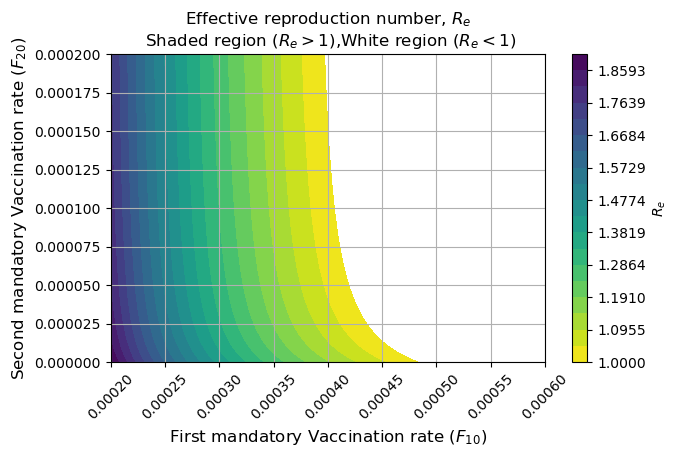

In [5]:

F10 = 0.0029
def Ef_Rep_function(F10,F20):
    S1_dfe = pi/(F10 +mu); S2_dfe = (pi*phi1*F10)/((phi1+mu)*(F10+mu)*(F20+mu)); V1_dfe = (pi*F10)/((phi1+mu)*(F10 +mu));
    V2_dfe = (pi*phi1*F10*F20)/(mu*(phi1+mu)*(F10+mu)*(F20+mu));
    N_dfe = S1_dfe + S2_dfe + V1_dfe + V2_dfe;
    
    C1 = (beta1*S1_dfe)/N_dfe;  C2 = (1/N_dfe)*(beta2*((1-eta2)*S2_dfe + (1-eta4)*V2_dfe) + beta2*(1-eta1)*V1_dfe);
    M1 = (eps*(1-tau))/((mu +eps)*(mu+rho+xi*T10))
    M2 = (eps*tau)/((mu +eps)*(d1+mu+rho+T10))
    M3 = (eps*tau)/((mu +eps)*(d1+mu+rho+T20))
    M4 = ( xi*(1-tau)*T10*eps*(d1+mu+rho+T10) + tau*T10*eps*(mu+rho+xi*T10))/((mu +eps)*(d1+mu+rho+T10)*(h1+mu+rhot)*(mu+rho+xi*T10))
    M5 = tau*T20*eps/((mu +eps)*(d1+mu+rho+T20)*(h2+mu+rhot))
    M6 = (eps*(1-tau))/((mu +eps)*(mu+rho+xi*T20))
    M7 = xi*(1-tau)*eps*T20/((mu +eps)*(mu+rho+xi*T20)*(h2+mu+rhot))
    return C1*(psi*M1 + M2 + M3 + (1-delta)*(M4+M5)) + C2*(psi*M6 + (1-delta)*M7)

# def Basic_Rep_function(beta1):    
#     return (beta1*eps*((tau1+tau2)*(mu+rho) +(1-tau1)*psi1*(mu+rho+d1)))/((eps+mu)*(mu+rho)*(mu+rho+d1))
   
threshold = 1
# T10 = np.linspace(0, 1, 1000)
# T20 = np.linspace(0, 1, 1000)
F10 = np.linspace(0.0002, 0.0006, 1000)
F20 = np.linspace(0, 0.0002, 1000)
#beta2 = np.linspace(0, 2, 1000)
# beta1 = np.linspace(0,8,1000)
#F20 = np.linspace(0, 0.0003, 1000)
x1,y1 = np.meshgrid(F10, F20)
z1 = Ef_Rep_function(x1,y1)

fig, axs = plt.subplots(figsize =(7,4))


#contour_levels = np.linspace(z1.min(), threshold, 20)
contour_levels = np.linspace(threshold, z1.max(), 20)
#contour_levels = np.sort(contour_levels)
#contour = axs.contourf(x1, y1, z1, levels=[threshold, z1.max()], cmap='viridis', alpha=0.3)
contour = axs.contourf(x1, y1, z1, cmap='viridis_r', levels=contour_levels) # offset=z1.min(),cmap='viridis', alpha=0.3

# axs[1].contourf(x2, y2, z2, levels=[threshold, z2.max()], cmap='rainbow', alpha=0.3)
# axs[2].contourf(x3, y3, z3, levels=[threshold, z3.max()], cmap='rainbow', alpha=0.3)

# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_surface(x1, y1, z1, cmap='viridis', edgecolor='k')
# contour = ax.contourf(x1, y1, z1, levels=[threshold, z1.max()], zdir='z1', offset=z1.min(), cmap='rainbow', alpha=0.3)

# Add labels and title
# axs.set_xlabel(r'First transmission rate ($\beta_{1}$)')
#axs.set_xlabel(r'Second transmission rate ($\beta_{2}$)')
axs.set_xlabel(r'First mandatory Vaccination rate ($F_{10}$)', fontsize=12)
axs.set_ylabel(r'Second mandatory Vaccination rate ($F_{20}$)',fontsize=12)
# axs.set_xlabel(r'First mandatory Testing rate ($T_{10}$)',fontsize=12)
# axs.set_ylabel(r'Second mandatory Testing rate ($T_{20}$)',fontsize=12)
#axs.xaxis.set_major_formatter('${:.0e}$'.format)
#axs.yaxis.set_major_formatter('${:.1e}$'.format)
plt.title('Effective reproduction number, $R_e$\n Shaded region ($R_e >1$),White region ($R_e <1$)', loc='center',fontsize=12)
#plt.title('Effective reproduction number $R_e$:\n Shaded region ($R_e <1$)', loc='center')
fig.colorbar(contour, label=r'$R_e$')
plt.grid(True)
plt.tick_params(axis='x', rotation=45)
plt.savefig('Region_stability_F10_F20_New_BB.pdf',dpi=600, bbox_inches='tight')
plt.show()